# Manipulating Time Series Data in Python

In this course we'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. We'll learn how to use methods built into Pandas to work with this index. We'll also learn how resample time series to change the frequency. This course will also show us how to calculate rolling and cumulative values for times series. Finally, we'll use all your new skills to build a value-weighted stock index from actual stock data.

## 1. Working with Time Series in Pandas

This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. We will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift our data in time or create period-specific returns.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import normal, seed, choice

In [2]:
# Create the range of dates here (defualt is "day"/"D")
seven_days = pd.date_range(start='2017-1-1', periods=7)
print(seven_days)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')
6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


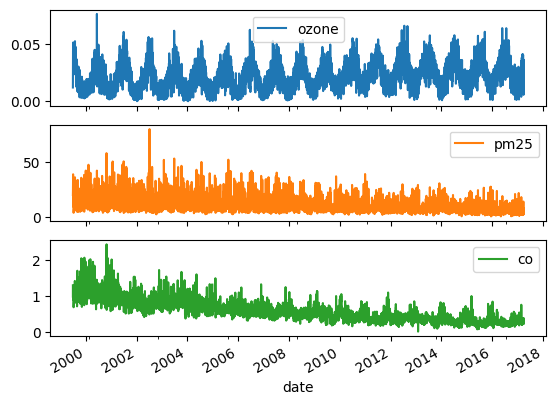

In [3]:
data = pd.read_csv('data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

    2013   2014   2015
0  20.08    NaN    NaN
1  19.78  39.59  50.17
2  19.86  40.12  49.13
3  19.40  39.93  49.21
4  19.66  40.92  48.59


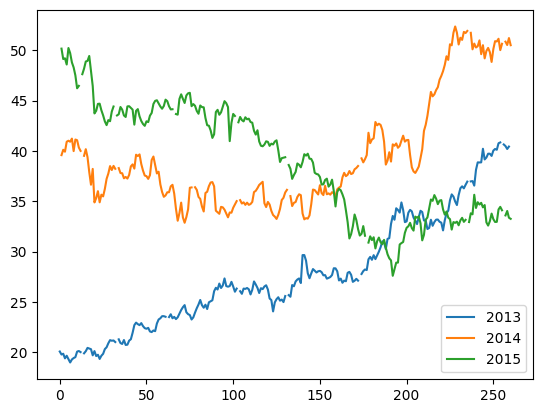

In [4]:
#  compare the performance for three years of Yahoo stock prices
yahoo = pd.read_csv('data/yahoo.csv')

# Convert the date column to datetime64
yahoo.date = pd.to_datetime(yahoo.date)

# Set date column as index
yahoo.set_index('date', inplace=True)

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

print(prices.head(5))  
# Plot prices
prices.plot()
plt.show()

The plot we just created shows Yahoo's stock price in three different years.

Now, we'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

We'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [5]:
#  compare the performance for three years of Yahoo stock prices
co = pd.read_csv('data/co_cities.csv')

# Convert the date column to datetime64
co.date = pd.to_datetime(co.date)

# Set date column as index
co.set_index('date', inplace=True)

co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


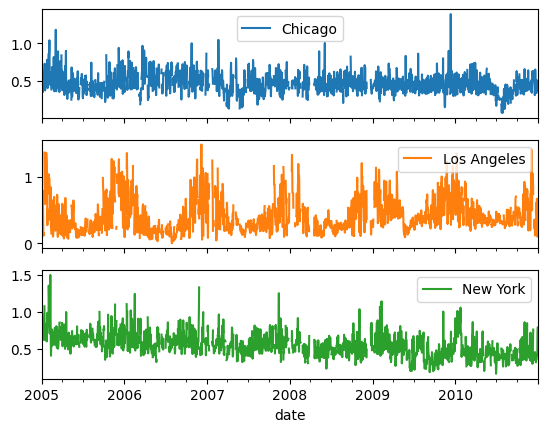

In [6]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

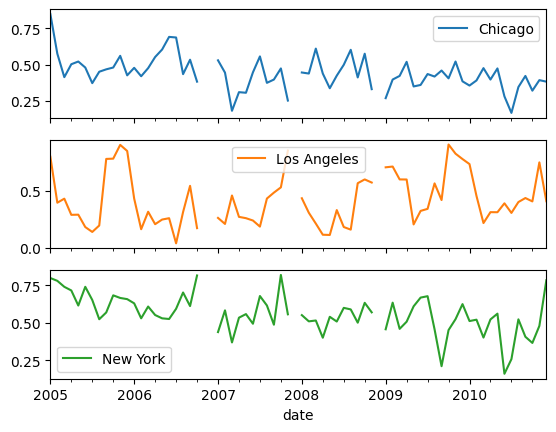

In [7]:
# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

#### Shifting stock prices across time

`.shift()` allows us shift all values in a `Series` or `DataFrame` by a number of periods to a different time along the `DateTimeIndex`. Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

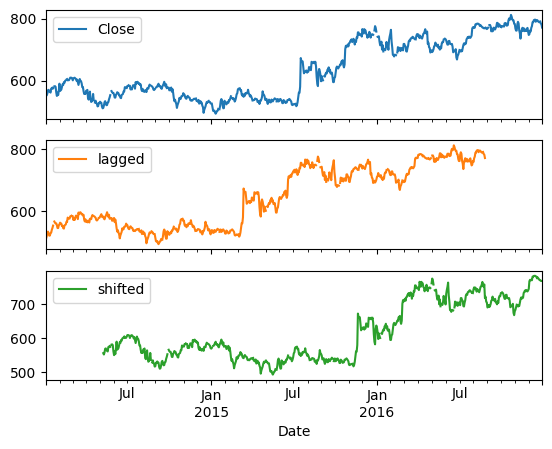

In [8]:
# Import data here
google = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(subplots=True)
plt.show()

Now we can visually compare the time series to itself at different points in time.

#### Calculating stock price changes
Now we'll practice a  calculation to calculate absolute changes from current and shifted prices, and compare the result to the function `.diff()`.

In [9]:
yahoo = yahoo.asfreq("B")
print(yahoo.info())

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo.shifted_30

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB
None
            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


There's usually more than one way to get to the same result when working with data.

#### Plotting multi-period returns

Let's use `.pct_change()` function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

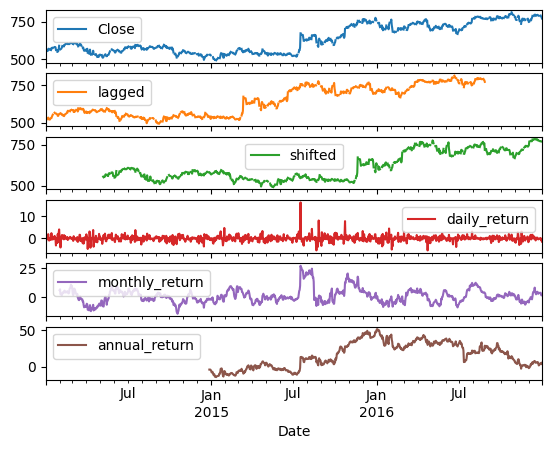

In [10]:
google=google.asfreq("D")
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

## 2. Basic Time Series Metrics & Resampling

This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

#### Compare time series growth rates

We can easily compare several time series by normalizing their starting points to 100, and plot the result. To broaden our perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


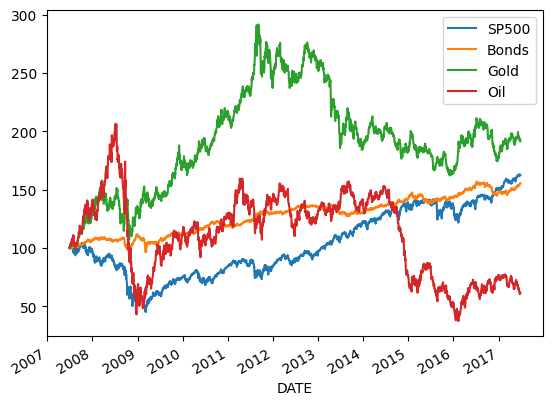

In [11]:
# Import data here
prices = pd.read_csv('data/asset_classes.csv', parse_dates=["DATE"], index_col="DATE")

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

Normalizing series is a common step in time series analysis.

Now we'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies. The three largest companies on the NYSE are: JNJ, XOM, and JPM.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


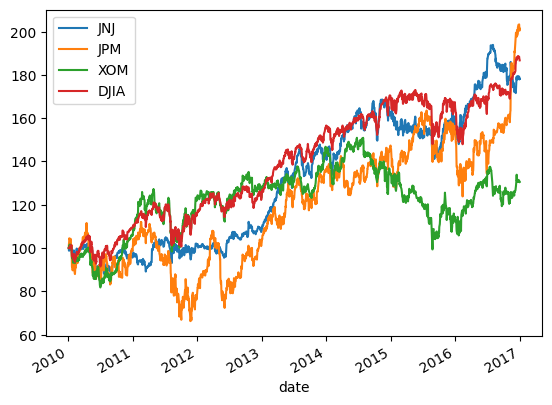

In [12]:
# Import stock prices and index here
stocks = pd.read_csv('data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

Let's calculate and plot the performance difference of a stock in percentage points relative to a benchmark index, Microsoft (`MSFT`) and Apple (`AAPL`) to the S&P 500 over the last 10 years.

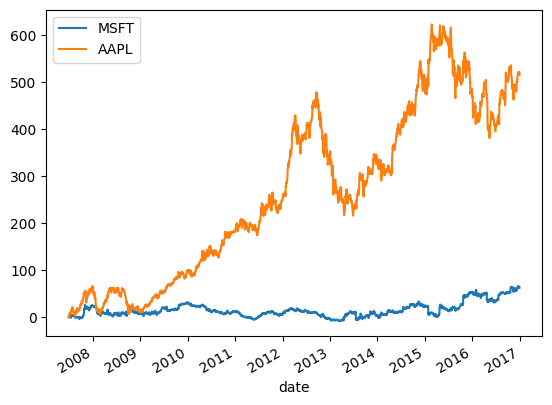

In [13]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('data/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('data/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

Now we can compare these stocks to the overall market so we can more easily spot trends and outliers.

#### Changing the time series frequency: resampling

Let's practice `.reindex()` method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [14]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


The civilian US unemployment rate is reported monthly. We may need more frequent data, but that's no problem because we just learned how to upsample a time series.
We'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


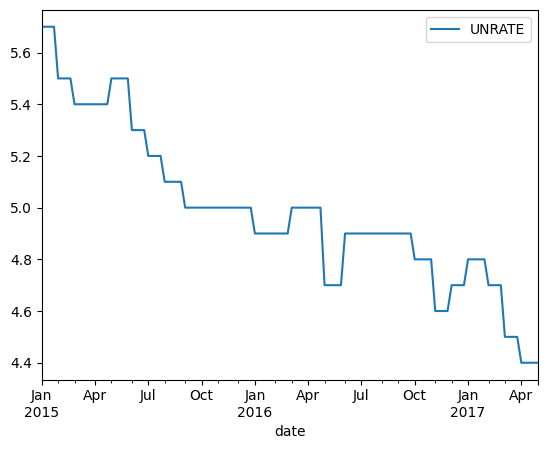

In [15]:
# Import data here
data = pd.read_csv('data/unrate_2000.csv', parse_dates=['date'], index_col='date').dropna()

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show()

#### Upsampling & interpolation with `.resample()`

In the cells above, we have used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods. Let's compare previous approach to the new `.interpolate()` method.

In [16]:
# Inspect data here
# Import data here
data = pd.read_csv('data/unrate_2000.csv', parse_dates=['date'], index_col='date').dropna().asfreq('MS')
data.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB
None


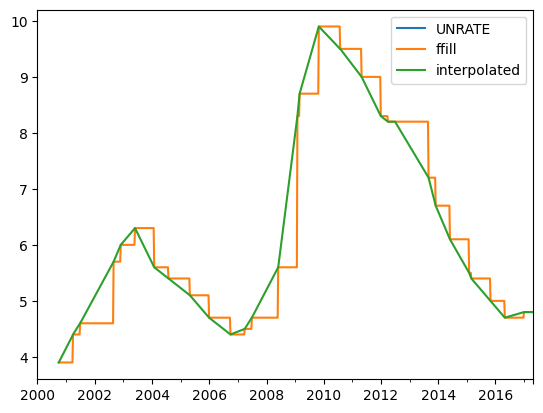

In [17]:
# Inspect data here
print(data.info())

# Create weekly dates
weekly_dates = pd.date_range(start= data.index.min(), end=data.index.max(), freq="W")

# Reindex monthly to weekly data
weekly = data.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

Interpolating is a useful way to create smoother time series when resampling. 

Since we have learned how to interpolate time series, we can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


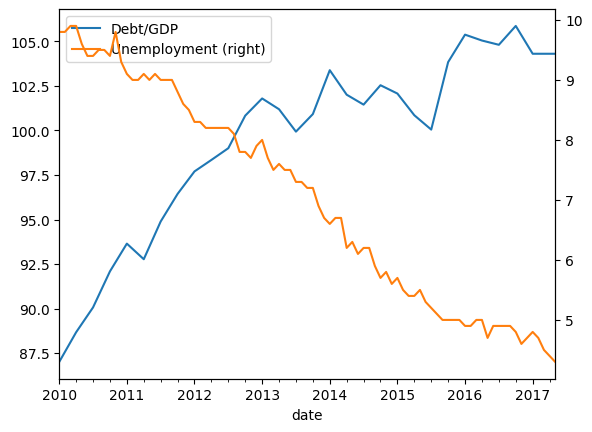

In [18]:
# Import & inspect data here
debt_unemp = pd.read_csv('data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(debt_unemp.info())

# Interpolate and inspect here
interpolated = debt_unemp.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

#### Downsampling & aggregation

First, we'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None
            Los Angeles  New York
date                             
2000-01-01     0.008375  0.004032
2000-01-02          NaN  0.009486
2000-01-03          NaN  0.005580
2000-01-04     0.005500  0.008717
2000-01-05     0.005000  0.013754


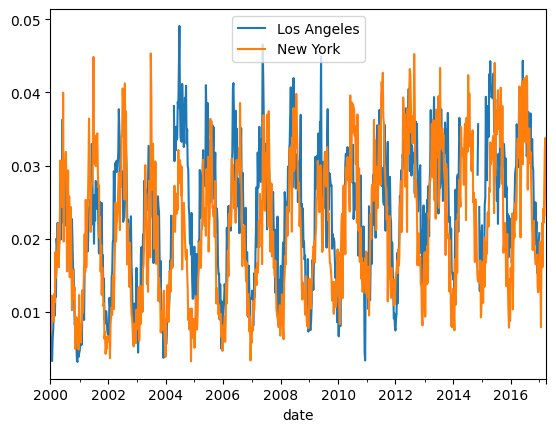

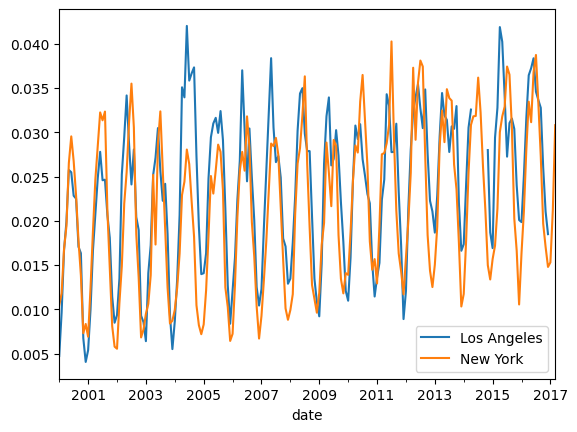

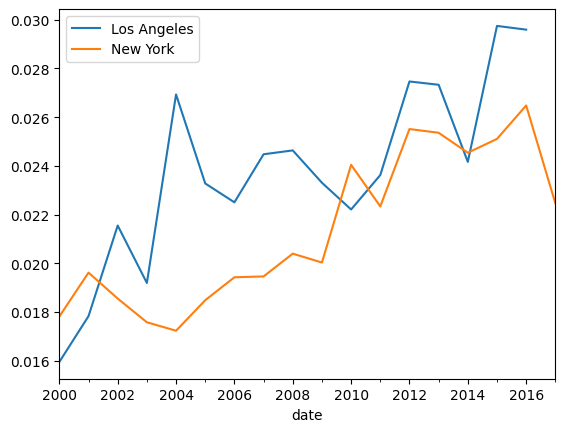

In [19]:
# Import and inspect data here
ozone = pd.read_csv('data/ozone_nyla.csv', parse_dates=['date'], index_col='date')

print(ozone.info())
print(ozone.head())


# Calculate and plot the weekly average ozone trend
ozone.resample("W").mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample("M").mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample("A").mean().plot()
plt.show()


Now, we'll apply our new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


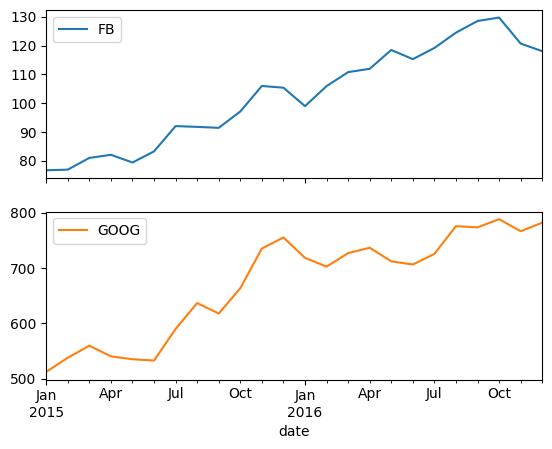

In [20]:
# Import and inspect data here
stocks = pd.read_csv('data/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()

monthly_average.plot(subplots=True)
plt.show()

With our new skill to downsample and aggregate time series, we can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, we'll resample the stock index to quarter start frequency using the alias `'QS'`, and aggregating using the `.first()` observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
            gdp_growth
date                  
2007-01-01         0.2
2007-04-01         3.1
2007-07-01         2.7
2007-10-01         1.4
2008-01-01        -2.7
###############################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None
                djia
date                
2007-06-29  13408.62
2007-07-02  13535.43
2007-07-03  13577.30
2007-07-04       NaN
2007-07-05  13565.84
###############################################
                djia

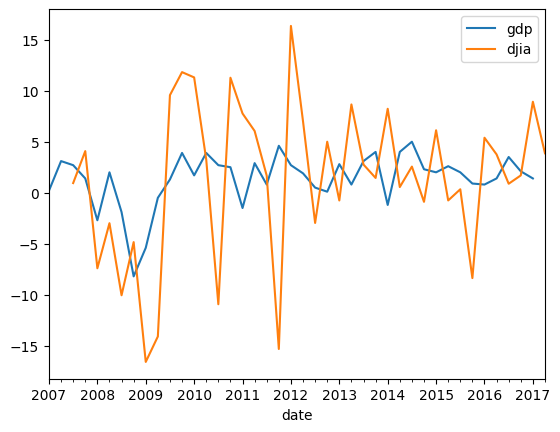

In [21]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('data/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())
print(gdp_growth.head())
print('###############################################')


# Import and inspect djia here
djia = pd.read_csv('data/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())
print(djia.head())
print('###############################################')

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)
print(djia_quarterly.head())
print(djia_quarterly_return.head())
print('###############################################')

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)


data.columns = ['gdp', 'djia']
print(data.head())
print('###############################################')
data.plot()
plt.show()

We have also learned how to calculate several aggregate statistics from upsampled data. Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


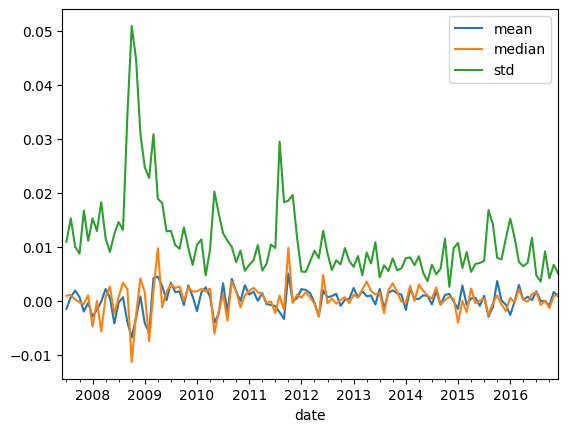

In [22]:
# Import data here
sp500 = pd.read_csv('data/sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show()

## 3. Window Functions: Rolling & Expanding Metrics
This chapter will show us how to use window function to calculate time series metrics for both rolling and expanding windows.

#### Rolling window functions with pandas

To practice rolling window functions, we'll start with air quality trends for New York City since 2010. In particular, we'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


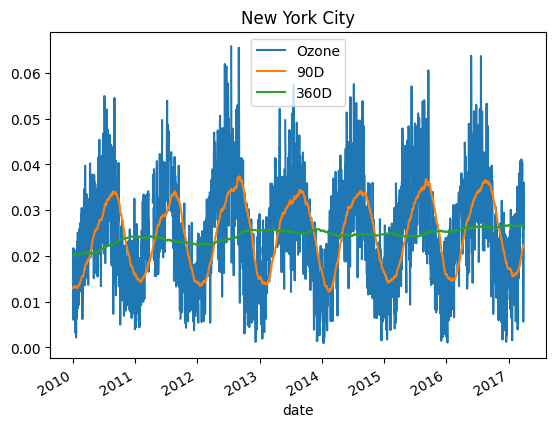

In [23]:
# Import and inspect ozone data here
data = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

Let's take a closer look at the air quality history of NYC using the Ozone data we have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

we'll be using a 360 day rolling window, and `.agg()` to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

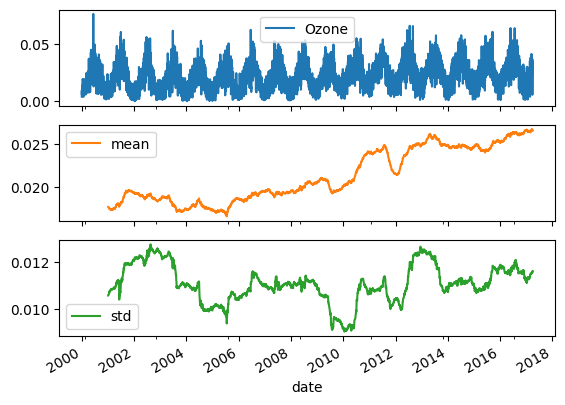

In [24]:
# Import and inspect ozone data here
data = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True);
plt.show()

The rolling quantiles describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation. Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [25]:
# Resample, interpolate and inspect ozone data here
data = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())
print(data.head())
print('######################################################################')
data = data.resample('D').interpolate()
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None
               Ozone
date                
2000-01-01  0.004032
2000-01-02  0.009486
2000-01-03  0.005580
2000-01-04  0.008717
2000-01-05  0.013754
######################################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None
               Ozone
date                
2000-01-01  0.004032
2000-01-02  0.009486
2000-01-03  0.005580
2000-01-04  0.008717
2000-01-05  0.013754


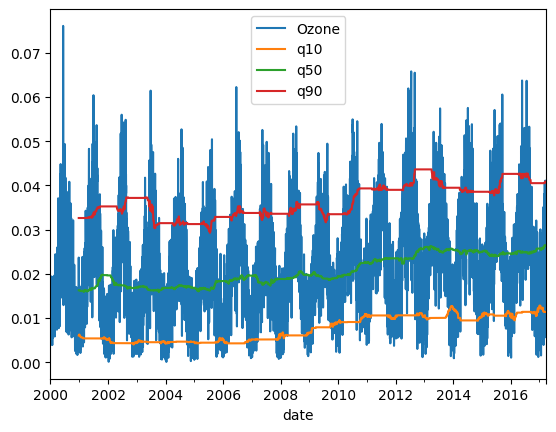

In [26]:
# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()
plt.show()

#### Expanding window functions with pandas

The cumulative sum method has in fact the opposite effect of the `.diff()` method that we came across in chapter 1. To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [27]:
data = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date')
data.dropna(inplace=True)
print(data.head())
print(40*'#')

# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = pd.concat([start_price, differences]).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04
########################################
True


The `.cumsum()` method allows you to reconstruct the original data from the differences. 

To put our new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google (`GOOG`) or Apple (`AAPL`) in 2010.

             AAPL    GOOG
Date                     
2010-12-16  45.89  295.56
2010-12-17  45.80  295.10
2010-12-20  46.03  297.23
2010-12-21  46.32  301.23
2010-12-22  46.45  302.44
########################################


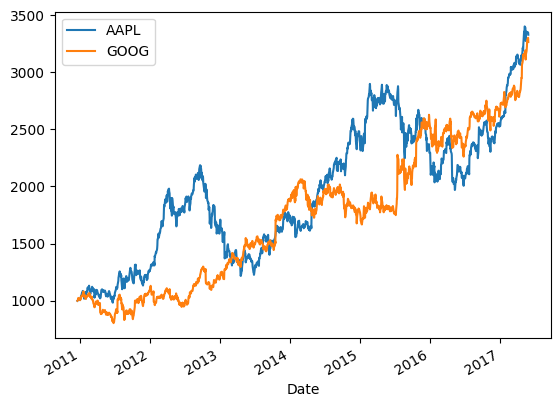

In [28]:
data = pd.read_csv('data/apple_google.csv', parse_dates=['Date'], index_col='Date')
data.dropna(inplace=True)
print(data.head())
print(40*'#')

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns+1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

Now let's take a look at the rolling annual returns on this investment.

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, let's calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

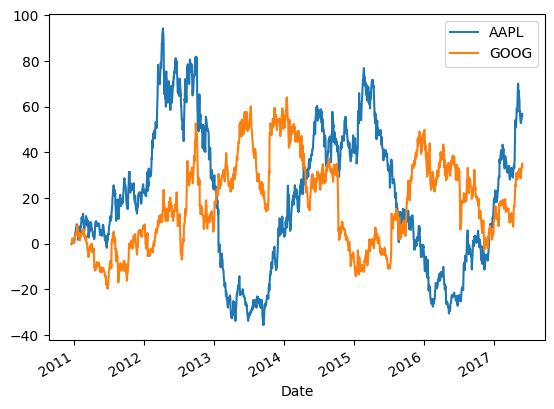

In [29]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns+1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

#### Case study: S&P500 price simulation

In this exercise, well build our own random walk by drawing random numbers from the normal distribution with the help of `numpy`.

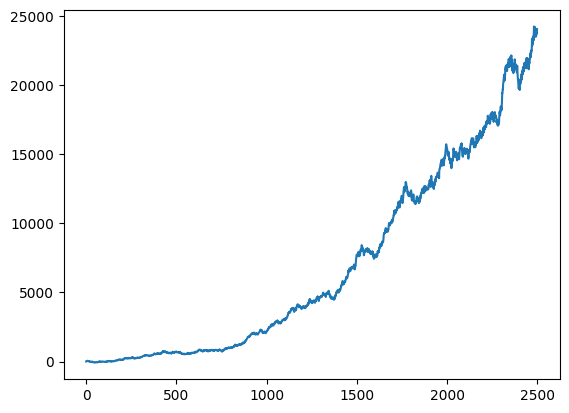

In [30]:
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(size=2500, loc=0.001, scale=0.01)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod().sub(1)

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

In the next exercise, we'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then we'll simulate an alternative random price path in the next exercise.

In [31]:
fb = pd.read_csv('data/fb.csv', parse_dates=['date'], index_col='date', squeeze=True)
print(fb.head())
print(40*'#')

date
2012-05-17    38.00
2012-05-18    38.23
2012-05-21    34.03
2012-05-22    31.00
2012-05-23    32.00
Name: Unnamed: 1, dtype: float64
########################################


C:\Users\DmitriGazizulin\AppData\Local\Temp\ipykernel_47628\1217584614.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  fb = pd.read_csv('data/fb.csv', parse_dates=['date'], index_col='date', squeeze=True)
C:\Users\DmitriGazizulin\AppData\Local\Temp\ipykernel_47628\1217584614.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  fb = pd.read_csv('data/fb.csv', parse_dates=['date'], index_col='date', squeeze=True)


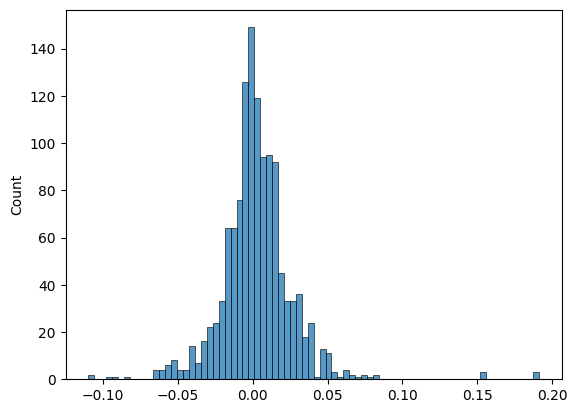

In [32]:
# Set seed here
seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.histplot(random_walk)
plt.show()

In this exercise, we'll complete our random walk simulation using Facebook stock returns over the last five years. We'll start off with a random sample of returns like the one we've generated during the last exercise and use it to create a random stock price path.

C:\Users\DmitriGazizulin\AppData\Local\Temp\ipykernel_47628\623157987.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  fb = pd.read_csv('data/fb.csv', parse_dates=['date'], index_col='date')
C:\Users\DmitriGazizulin\AppData\Local\Temp\ipykernel_47628\623157987.py:26: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_price = start.append(random_walk)


            price
date             
2012-05-17  38.00
2012-05-18  38.23
2012-05-21  34.03
2012-05-22  31.00
2012-05-23  32.00
########################################
date
2012-05-18   -0.008275
2012-05-21    0.003550
2012-05-22   -0.008547
2012-05-23    0.015533
2012-05-24   -0.014011
                ...   
2017-05-24    0.000758
2017-05-25    0.023873
2017-05-26   -0.008447
2017-05-30    0.029692
2017-05-31    0.052650
Name: price, Length: 1266, dtype: float64
########################################


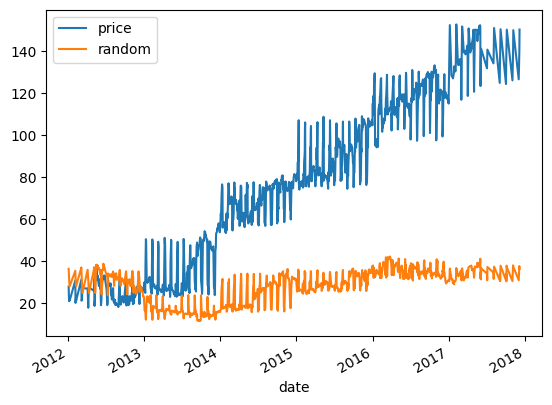

In [33]:
fb = pd.read_csv('data/fb.csv', parse_dates=['date'], index_col='date')
fb.rename( columns={'Unnamed: 1':'price'}, inplace=True )
fb.dropna(inplace=True)
print(fb.head())
print(40*'#')

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.shape[0]


random_walk = daily_returns.price.sample(n=n_obs, replace=True, ignore_index=True)
random_walk.index = daily_returns.index
print(random_walk)
print(40*'#')


# Select fb start price here
start = fb.price.first('D')


# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()

__NOTE__: it seems somthing wrong with the `fb` data.

#### Relationships between time series: correlation

In this exercise, we will use the historical stock prices. We'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [34]:
data = pd.read_csv('data/stock_data.csv', parse_dates=['Date'], index_col='Date')
data.dropna(inplace=True)
print(data.info())
print(data.head())
print(40*'#')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
dtypes: float64(12)
memory usage: 178.9 KB
None
             AAPL   AMGN    AMZN  CPRT     EL      GS   ILMN     MA    PAA  \
Date                                                                         
2010-01-04  30.57  57.72  133.90  4.55  24.27  173.08  30.55  25.68  27.00   
2010-01-05  30.63  57.22  134.69  4.55  24.18  176.14  30.35  25.61  27.30 

          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.639423 -0.782640 -0.139609 -0.087176 -0.064160  0.196741   
AMGN  0.639423  1.000000 -0.267567 -0.484273  0.265609  0.174887  0.780599   
AMZN -0.782640 -0.267567  1.000000 -0.221807  0.157860  0.147352  0.161325   
CPRT -0.139609 -0.484273 -0.221807  1.000000 -0.141719  0.215925 -0.407780   
EL   -0.087176  0.265609  0.157860 -0.141719  1.000000 -0.612696 -0.076387   
GS   -0.064160  0.174887  0.147352  0.215925 -0.612696  1.000000  0.668701   
ILMN  0.196741  0.780599  0.161325 -0.407780 -0.076387  0.668701  1.000000   
MA   -0.062480  0.307340  0.036423  0.262015  0.848515 -0.213024  0.090952   
PAA   0.437532  0.084473 -0.662189  0.777572 -0.220852  0.354054 -0.020424   
RIO   0.107493 -0.130477 -0.204586  0.686494 -0.670398  0.789932  0.175800   
TEF  -0.278297  0.361544  0.119589  0.043987  0.166489  0.496342  0.612399   
UPS  -0.143425  0.188402 -0.178911  0.443566 -0.008023  0.543398

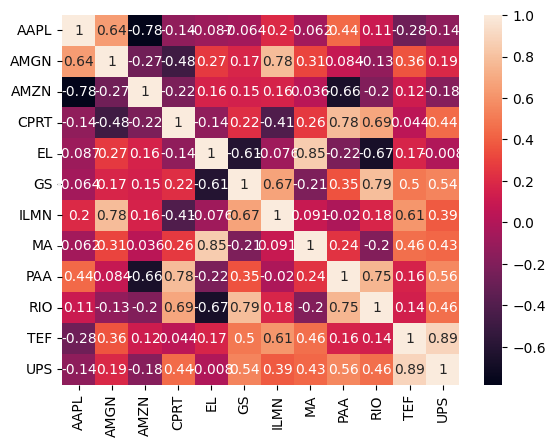

In [35]:
# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

## 4. Putting it all together: Building a value-weighted index

This chapter combines the previous concepts by teaching us how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.

#### Select index components & import data
To get started with the construction of a market-value based index, we'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, we will calculate market-cap weights for these stocks.

In [36]:
listings = pd.concat(pd.read_excel('data/listings.xlsx', sheet_name=None, na_values='n/a'), ignore_index=True)
listings['Market Capitalization'] /= 1e6 # in Million USD

C:\Users\DmitriGazizulin\anaconda3\envs\lingua\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\DmitriGazizulin\anaconda3\envs\lingua\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\DmitriGazizulin\anaconda3\envs\lingua\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [37]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[ listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby(['Sector']).size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
dtypes: float64(3), object(4)
memory usage: 365.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2349 non-null   object 
 1   Last Sale              2349 non-null   float64
 2   Market Capitalization  2349 non-null   float64
 3   

Now that we have imported and cleaned the listings data, we can proceed to select the index components as the largest company for each sector by market capitalization. We'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [38]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Miscellaneous          BABA            275525.000000
Health Care            AMGN            118927.210535
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Energy                 PAA              22223.001416
Consumer Durables      CPRT             13620.922869
Name: Market Capitalization, dtype: float64
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                   

Now we'll use the stock symbols for the companies we selected in the last exercise to calculate returns for each company.

Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


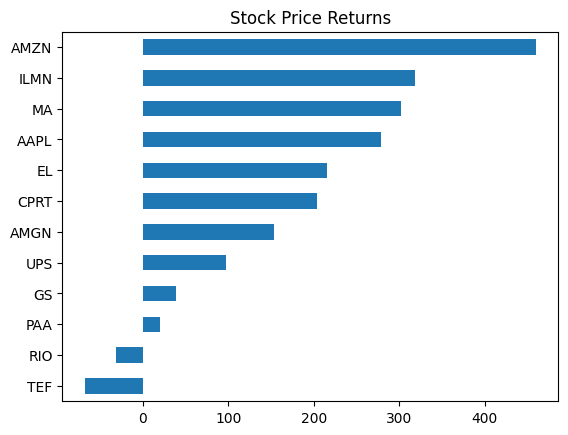

In [39]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('data/stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

#### Build a market-cap weighted index

The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow us to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [40]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2349 non-null   object 
 1   Last Sale              2349 non-null   float64
 2   Market Capitalization  2349 non-null   float64
 3   IPO Year               2349 non-null   float64
 4   Sector                 2349 non-null   object 
 5   Industry               2349 non-null   object 
dtypes: float64(3), object(3)
memory usage: 193.0+ KB
None
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    70431.476895      38.94
GM                     50086.335099      33.39
CPRT                   13620.922869      29.65
ABEV                   88240.198455       

We can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which we will complete in the next exercise.

In [43]:
components = components.merge(no_shares.rename('Number of Shares'), left_index=True, right_index=True)
components.head()

,Market Capitalization,Last Sale,Number of Shares
Stock Symbol,,,
RIO,70431.476895,38.94,1808.717948
GM,50086.335099,33.39,1500.039985
CPRT,13620.922869,29.65,459.390316
ABEV,88240.198455,5.62,15701.102928
AMZN,422138.530626,884.67,477.170618


Stock Symbol
GS        397.817439
CPRT      459.390316
AMZN      477.170618
PAA       723.404994
AMGN      735.890171
UPS       869.297154
GM       1500.039985
RIO      1808.717948
BABA     2500.000000
TEF      5037.804990
AAPL     5246.540000
ABEV    15701.102928
Name: Number of Shares, dtype: float64


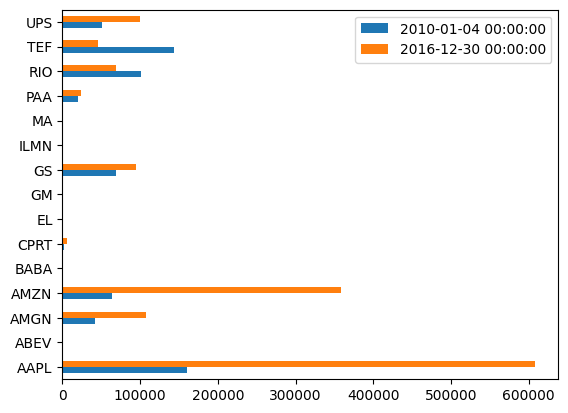

In [44]:
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

By now we have all ingredients that we need to calculate the aggregate stock performance for our group of companies.

We will use the time series of market capitalization that we created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [45]:
stock_prices.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946857e+05
2010-01-07    6.912416e+05
2010-01-08    6.958476e+05
                  ...     
2016-12-23    1.588874e+06
2016-12-27    1.599280e+06
2016-12-28    1.593635e+06
2016-12-29    1.589422e+06
2016-12-30    1.574862e+06
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675001
2016-12-27    230.172669
2016-12-28    229.360223
2016-12-29    228.753821
2016-12-30    226.658267
Length: 1762, dtype: float64


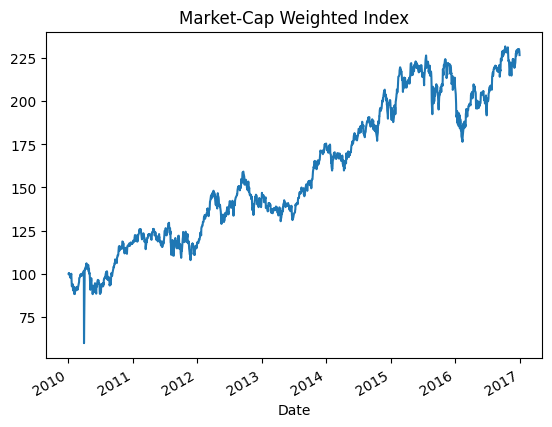

In [46]:
market_cap_series = pd.read_csv('data/market_cap_series.csv', parse_dates=['Date'], index_col='Date')

# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

#### Evaluate index performance

We have successfully built the value-weighted index. Let's now explore how it performed over the time.

Let's also determine how much each stock has contributed to the index return.

126.65826661173818
Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64


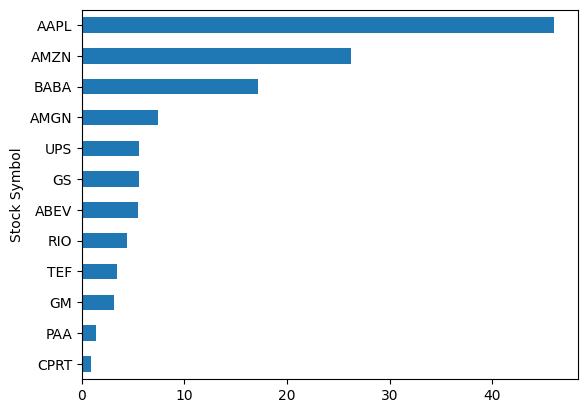

In [47]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

The next step in analyzing the performance of your index is to compare it against a benchmark.

We will use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [59]:
djia = pd.read_csv('data/djia2.csv', parse_dates=['DATE'], index_col='DATE')

Index    126.658267
DJIA      86.722172
dtype: float64


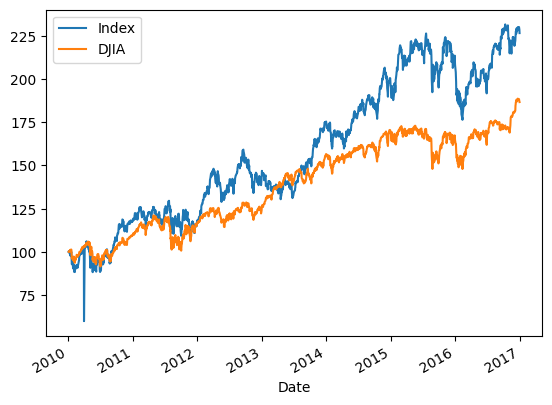

In [60]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0], axis=1).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print((data.iloc[-1] / data.iloc[0] - 1) * 100)

# Plot both series
data.plot()
plt.show()

The next step in analyzing the performance of your index is to compare it against a benchmark.

We will use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

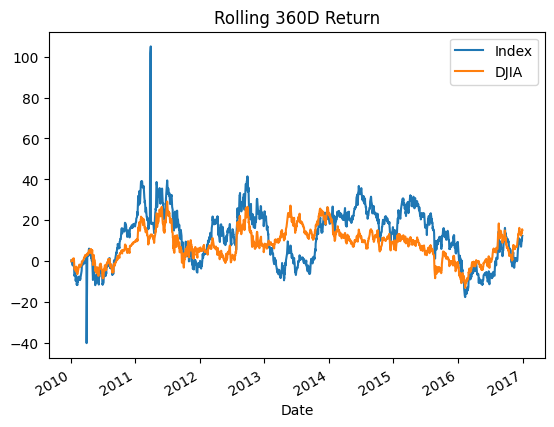

In [61]:
# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

To better understand the characteristics of our index constituents, we can calculate the return correlations.

We will use the daily stock prices or our index companies, and show a heatmap of the daily return correlations!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726 

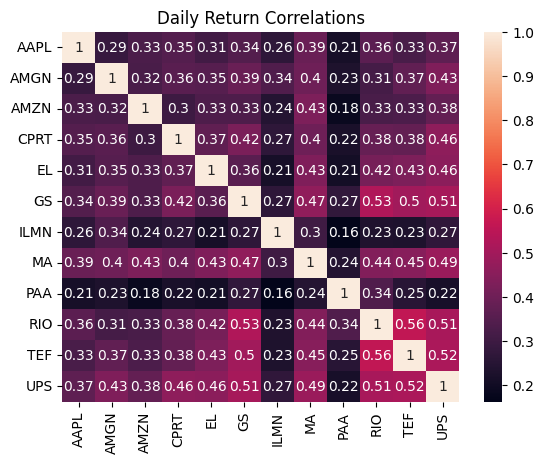

In [62]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()


In [65]:
# Join index to stock_prices, and inspect the result
data = stock_prices.join(index.to_frame('Index'))
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# # Export data and data as returns to excel
# with pd.ExcelWriter('data.xls') as writer:
#     data.to_excel(writer, sheet_name='data')
#     returns.to_excel(writer, sheet_name='returns')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
 12  Index   1762 non-null   float64
dtypes: float64(13)
memory usage: 257.3 KB
None
